# Analysis the Effective Parameters on the Employee Attrition Using A/B testing

Employee attrition rate is also known as employee turnover. A term often used by human resources professionals to determine a company’s ability to retain employees. Usually companies prefer a low attrition rate, but the rates differ based on the industry. A lower employee turnover rate allows a company to keep coherence over the year. hiring new employees take much efforts and costs such as recruitment costs, training and development costs, administration costs, and... So employers in different industries would be benefited if they can decrease the attrition rate in their organization. 
The dataset used in this research, shows IBM HR Analytics Employee Attrition & Performance. The dataset uncover the potential factors that may lead to employee attrition. Here, I studied how distance from home for employees can be important factor for attrition rate using A/B testing. The link for the dataset is here: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data I also downloaded the dataset to my google drive and it is accessible through this link : https://drive.google.com/open?id=1v7RApQthTRtc9V-Jg4psLe8HRLjQADCl

The null and alternative hypotheses are as following:

Ho: There is no significant difference between the median commuting distance for employees who left the job and who kept their jobs.

Ha: There is a significant difference between the median commuting distance for employees who left the job and who kept their jobs.   

data contains 1470 observations and 35 columns. There are no missing values.

In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io 
from scipy import stats


In [4]:
from google.colab import files
uploaded = files.upload()



Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

In [0]:
data.columns = data.columns.str.lower()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [8]:
data.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [9]:
data.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
len(data.columns)

35

In [11]:
len(data)

1470

In [12]:
data.describe(include='all')

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [0]:
data_att = data[data['attrition']=='Yes']
data_other = data[data['attrition']=='No']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37bb993278>,
      dtype=object)

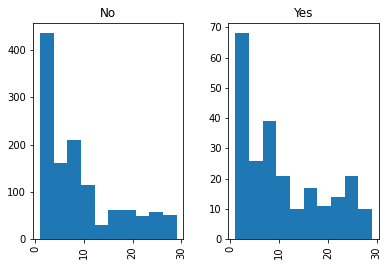

In [14]:
data['distancefromhome'].hist(by=data['attrition'])
# data does not look normally distributed

Text(0.5, 1.0, 'data distribution')

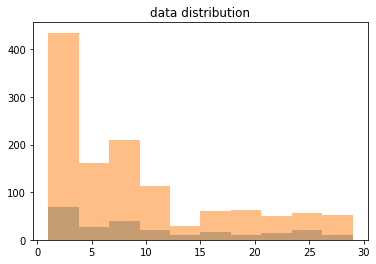

In [15]:
plt.hist(data_att['distancefromhome'],alpha=0.5)

plt.hist(data_other['distancefromhome'], alpha=0.5)

plt.title('data distribution')

In [16]:
print('The statistical data for employees who left the company are {}'.format(stats.describe(data_att['distancefromhome'])))
print('The statistical data for employees who did not leave the company are {}'.format(stats.describe(data_other['distancefromhome'])))

The statistical data for employees who left the company are DescribeResult(nobs=237, minmax=(1, 29), mean=10.632911392405063, variance=71.44518343703068, skewness=0.6318715334830777, kurtosis=-0.8674734233081853)
The statistical data for employees who did not leave the company are DescribeResult(nobs=1233, minmax=(1, 29), mean=8.915652879156529, variance=64.2022953729158, skewness=1.0278532177701256, kurtosis=-0.049035971751739904)


In [17]:
print (stats.shapiro(data_att['distancefromhome']))
# W is not close to 1 and P is smaller than 0.05, so data is not normal

(0.8959434628486633, 9.868997979944893e-12)


In [18]:
print (stats.shapiro(data_other['distancefromhome']))
# W is not close to 1 and P is smaller than 0.05, so data is not normal

(0.8534793257713318, 2.4682859931885524e-32)


In [19]:
stats.kruskal(data_att['distancefromhome'],data_other['distancefromhome'])

KruskalResult(statistic=9.225723965000004, pvalue=0.002386383151703113)

based on p-value we can reject the null hypothesis that these two variables have same distribution.



In [20]:
data_att['distancefromhome'].median()

9.0

In [21]:
data_other['distancefromhome'].median()

7.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37bb39fb38>,
      dtype=object)

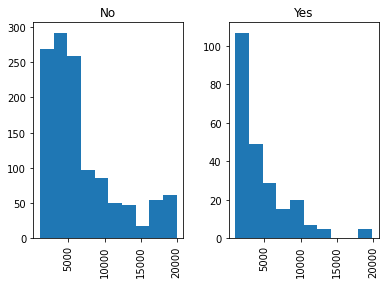

In [22]:
data['monthlyincome'].hist(by=data['attrition'])

In [23]:
print (stats.shapiro(data_att['monthlyincome']))
# W is not close to 1 and P is smaller than 0.05, so data is not normal

(0.7798969745635986, 1.5025734172664523e-17)


In [26]:
stats.kruskal(data_att['monthlyincome'],data_other['monthlyincome'])

KruskalResult(statistic=57.768241263784475, pvalue=2.948926498830519e-14)

same results was obtained for monthly salary. based on p-value we can reject the null hypothesis that these two variables have same distribution.

In [27]:
data_att['monthlyincome'].median()

3202.0

In [28]:
data_other['monthlyincome'].median()

5204.0

# Results and Discussion


Based on a visual inspection, data for distance from home are not close  to normally distributed which is confirmed with Shapiro test. So I proceeded with the Kruskal test. Based on a p-value of .00239, I reject the null that There is no significant difference between the median commuting distance for employees who left the job and who kept their jobs.
Median of the distance from home for who left the job is 9 and median of the distance from home for who stay at their jobs is 7. 
The obtained results shows that the commuting time and distance is important factor for employees to decide to look for another job. Monthly salary was also studied similarly and Other parameters like getting promotion and ...  could also be studied in the future.